# muMAG Standard Problem #4

A detailed problem description can be found [here](https://www.ctcms.nist.gov/~rdm/std4/spec4.html)

## Google Colab Link

The demo can be run on Google Colab without any local installation.
Use the following [link](https://colab.research.google.com/drive/1kYudJgbuhGBrhTTFs_HzT68LxFcVkJPu) to try it out.

In [2]:
!pip install -q magnumnp numpy==1.22.4

## Run Demo:

In [3]:
#TODO: read latest script content from gitlab repository, as soon as %load works with Colab
from magnumnp import *
import torch

Timer.enable(log_mem = True)

# initialize mesh
eps = 1e-15
n  = (100, 25, 1)
dx = (5e-9, 5e-9, 3e-9)
mesh = Mesh(n, dx)
state = State(mesh)

state.material = {
    "Ms": 8e5,
    "A": 1.3e-11,
    "alpha": 0.02
    }

# initialize field terms
demag    = DemagField()
exchange = ExchangeField()
external = ExternalField([-24.6e-3/constants.mu_0,
                          +4.3e-3/constants.mu_0,
                          0.0])

# initialize magnetization that relaxes into s-state
state.m = state.Constant([0,0,0])
state.m[1:-1,:,:,0]   = 1.0
state.m[(-1,0),:,:,1] = 1.0

# relax without external field
llg = LLGSolver([demag, exchange])
llg.relax(state)
write_vti(state.m, "data/m0.vti", state)

# perform integration with external field
llg = LLGSolver([demag, exchange, external])
logger = Logger("data", ['t', 'm'])
while state.t < 1e-9-eps:
    llg.step(state, 1e-11)
    logger << state

Timer.print_report()


2023-11-06 14:23:57  magnum.np:WARNING module 'torch' has no attribute 'compile'
2023-11-06 14:23:57  magnum.np:INFO magnum.np 1.1.3
/home/florian/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0
2023-11-06 14:23:57  magnum.np:INFO [State] running on device: cpu (dtype = float64)
2023-11-06 14:23:57  magnum.np:INFO [Mesh] 100x25x1 (size= 5e-09 x 5e-09 x 3e-09)
2023-11-06 14:23:57  magnum.np:INFO [LLGSolver] using RKF45 solver (atol = 1e-05)
2023-11-06 14:23:57  magnum.np:INFO [DEMAG]: Time calculation of demag k

2023-11-06 14:24:05  magnum.np:INFO [LLG] relax: t=7.2e-10 dE=8.08249e-05 E=6.3137e-19
2023-11-06 14:24:05  magnum.np:INFO [LLG] relax: t=7.3e-10 dE=7.53497e-05 E=6.31323e-19
2023-11-06 14:24:05  magnum.np:INFO [LLG] relax: t=7.4e-10 dE=7.0235e-05 E=6.31278e-19
2023-11-06 14:24:05  magnum.np:INFO [LLG] relax: t=7.5e-10 dE=6.54502e-05 E=6.31237e-19
2023-11-06 14:24:05  magnum.np:INFO [LLG] relax: t=7.6e-10 dE=6.09752e-05 E=6.31198e-19
2023-11-06 14:24:05  magnum.np:INFO [LLG] relax: t=7.7e-10 dE=5.67971e-05 E=6.31163e-19
2023-11-06 14:24:05  magnum.np:INFO [LLG] relax: t=7.8e-10 dE=5.28934e-05 E=6.31129e-19
2023-11-06 14:24:05  magnum.np:INFO [LLG] relax: t=7.9e-10 dE=4.92528e-05 E=6.31098e-19
2023-11-06 14:24:05  magnum.np:INFO [LLG] relax: t=8e-10 dE=4.58498e-05 E=6.31069e-19
2023-11-06 14:24:05  magnum.np:INFO [LLG] relax: t=8.1e-10 dE=4.26779e-05 E=6.31042e-19
2023-11-06 14:24:06  magnum.np:INFO [LLG] relax: t=8.2e-10 dE=3.97174e-05 E=6.31017e-19
2023-11-06 14:24:06  magnum.np:INFO 

2023-11-06 14:24:14  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.4e-10
2023-11-06 14:24:14  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.5e-10
2023-11-06 14:24:14  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.6e-10
2023-11-06 14:24:14  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.7e-10
2023-11-06 14:24:14  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.8e-10
2023-11-06 14:24:14  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.9e-10
2023-11-06 14:24:14  magnum.np:INFO [LLG] step: dt= 1e-11  t=3e-10
2023-11-06 14:24:14  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.1e-10
2023-11-06 14:24:15  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.2e-10
2023-11-06 14:24:15  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.3e-10
2023-11-06 14:24:15  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.4e-10
2023-11-06 14:24:15  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.5e-10
2023-11-06 14:24:15  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.6e-10
2023-11-06 14:24:15  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.7e-10
2023-11-06 14:24:15  magnum.np:INFO 


TIMER REPORT
Operation              No of calls    Avg time [ms]    Total time [s]    Memory [MB]
-------------------  -------------  ---------------  ----------------  -------------
LLGSolver.relax                  1    13356.2              13.3562           6.88672
    DemagField.h              5131        1.29731           6.65649          6.82812
    ExchangeField.h           5131        0.70471           3.61587          0
LLGSolver.step                 100      127.107            12.7107           1.52734
    DemagField.h              4788        1.19447           5.71914          1.52734
    ExchangeField.h           4788        0.664887          3.18348          0
    ExternalField.h           4788        0.0634773         0.30393          0
-------------------  -------------  ---------------  ----------------  -------------
Total                                                      26.1452
Missing                                                     0.0782211



## Plot Results:

In [4]:
from os import path
if not path.isdir("ref"):
    !mkdir ref
    !wget -P ref https://gitlab.com/magnum.np/magnum.np/raw/main/demos/sp4/ref/m.dat

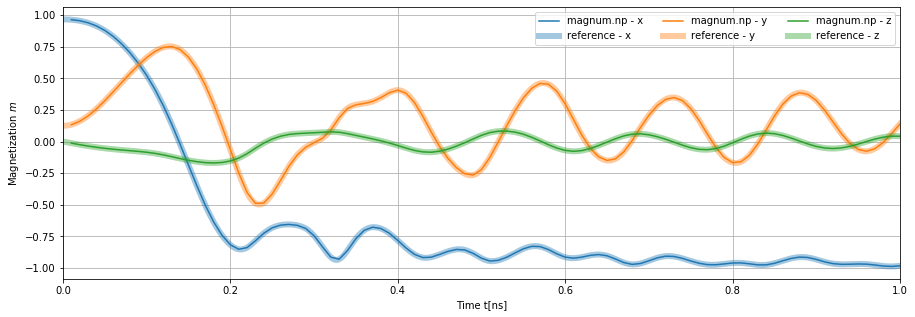

In [5]:
#TODO: read latest script content from gitlab repository, as soon as %load works with Colab

import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data/log.dat")
ref = np.loadtxt("ref/m.dat")

fig, ax = plt.subplots(figsize=(15, 5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
ax.plot(data[:,0]*1e9, data[:,1], '-', color = cycle[0], label = "magnum.np - x")
ax.plot(ref[:,0]*1e9, ref[:,1], '-', color = cycle[0], linewidth = 6, alpha = 0.4, label = "reference - x")

ax.plot(data[:,0]*1e9, data[:,2], '-', color = cycle[1], label = "magnum.np - y")
ax.plot(ref[:,0]*1e9, ref[:,2], '-', color = cycle[1], linewidth = 6, alpha = 0.4, label = "reference - y")

ax.plot(data[:,0]*1e9, data[:,3], '-', color = cycle[2], label = "magnum.np - z")
ax.plot(ref[:,0]*1e9, ref[:,3], '-', color = cycle[2], linewidth = 6, alpha = 0.4, label = "reference - z")

ax.set_xlim([0,1])
ax.set_xlabel("Time t[ns]")
ax.set_ylabel("Magnetization $m$")
ax.legend(ncol=3)
ax.grid()
fig.savefig("data/results.png")